# Tutoriel n°4 : Clustering Hiérarchique et Dendrogrammes

## A : Importation des bibliothèques et des données

### Bibliothèques

In [1]:
import numpy as np #Gestion des tableaux
import pandas as pd #Gestion des bases de données
import matplotlib.pyplot as plt #Affichage de graphiques
import scipy.cluster.hierarchy as sch #Hierarchical clustering

### Données

In [2]:
Donnees = pd.read_excel("Données normalisées.xlsx")
Centers = pd.read_excel("Centers.xlsx")
N_clusters=len(Centers)
colors=[plt.cm.rainbow(x) for x in np.linspace(0,1,N_clusters)]

## B : Clustering Hiérarchique

### Le clustering hiérarchique : explication

<img src="Captures\H\graph1.png" width=500>

<img src="Captures\H\den1.png" width=500>

<img src="Captures\H\ex1.png" width=500>

<img src="Captures\H\ex2.png" width=500>

<img src="Captures\H\ex3.png" width=500>

<img src="Captures\H\ex4.png" width=500>

### Le clustering

In [3]:
link=sch.linkage(Centers, method='ward')

In [4]:
for index,element in enumerate(link):
    print(index+10,"\t", element)

10 	 [4.         5.         1.08267624 2.        ]
11 	 [8.         9.         1.13701686 2.        ]
12 	 [2.         3.         1.16131955 2.        ]
13 	 [6.         7.         1.34175375 2.        ]
14 	 [0.         1.         1.38217312 2.        ]
15 	 [10.         13.          2.86711056  4.        ]
16 	 [12.       14.        2.951694  4.      ]
17 	 [11.         15.          4.96316025  6.        ]
18 	 [16.        17.        10.9800366 10.       ]


### Le dendrogramme

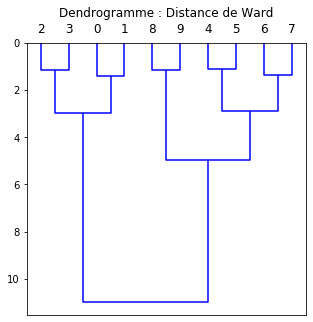

In [5]:
plt.figure(figsize=(5,5))
plt.subplot(111)
plt.title('Dendrogramme : Distance de Ward')
#Affichage  dendrogramme
den=sch.dendrogram(link,color_threshold=0.,orientation='bottom')
plt.show()

## C : Dendrogramme coloré

#### Liste des positions

In [6]:
def compos(link,n=(N_clusters-1)*2,num=0):
    #Renvoie par récursivité une liste contenant les informations 
    #sur les points dépendants du cluster ou groupe de clusters n.
    #format élément : [nom, Y, X, couleur, [clusters du groupe],next Y, next X]
    if(n<N_clusters):
        return([[n,num,1,colors[n],[n]]])
    ng,nd=link[n-N_clusters,0:2]
    Lg=compos(link,ng,num)
    Ld=compos(link,nd,num+len([i[0] for i in Lg if i[0]<N_clusters]))
    new=[n,(Lg[-1][1]*len(Lg[-1][4])+Ld[-1][1]*len(Ld[-1][4]))/(len(Ld[-1][4])+len(Lg[-1][4])),(len(Lg[-1][4]+Ld[-1][4])),
         mean(Lg[-1][3],Ld[-1][3],len(Lg[-1][4]),len(Ld[-1][4])),Lg[-1][4]+Ld[-1][4]]
    Lg[-1]+=[new[1],new[2]]
    Ld[-1]+=[new[1],new[2]]
    return(Lg+Ld+[new])

#### Affichage de la liste

In [7]:
def plot(ax,L,axes=False): 
    #Trace le graphique en fonction des informations contenues dans la liste L
    ax.set_ylabel("Nombre de clusters")
    for i in L[:-1]:
        ax.plot([i[1],i[5]],[-i[2],-i[6]],color=i[3],linewidth=3+2*len(i[4]),alpha=0.9,zorder=2)
        ax.text(i[1]+0.2+0.05*len(i[4]),-(i[2]+0.04-0.08*len(i[4])),
                str(i[4]).strip('[]'),fontweight="bold",zorder=10)
    for i in L:
        ax.scatter(i[1],-i[2],color=i[3],s=len(i[4])*500,alpha=1,zorder=5)
    ax.text(L[-1][1]+0.5,-(L[-1][2]-0.4),"All clusters",fontweight="bold",zorder=10)

#### Moyenne de 2 tuples

In [8]:
def mean(T1,T2,p1,p2): #Moyenne pondérée entre 2 tuples
    return tuple([(T1[i]*p1+T2[i]*p2)/(p1+p2) for i in range(len(T1))])


#### Affichage

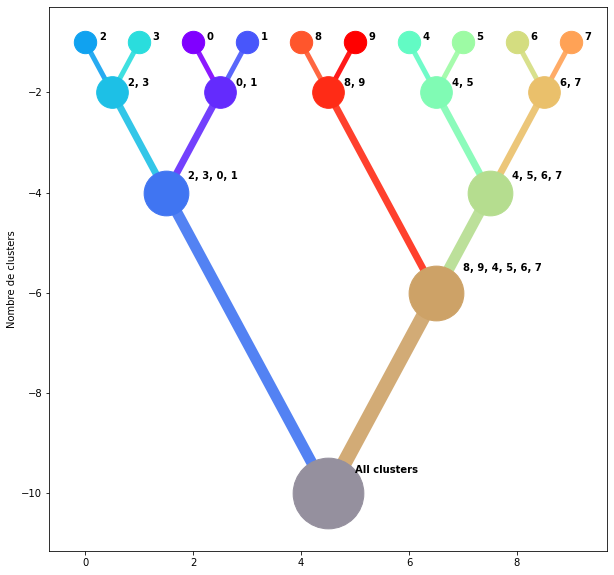

In [9]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111) 

nplink=np.array(link).astype(int)
L_clusters=list(compos(nplink))

plot(ax,L_clusters)
plt.show()

## D : Dendrogramme Circulaire Coloré

#### Modification de la fonction de composition de la liste.

In [10]:
def compos(link,n=(N_clusters-1)*2,num=0):
    #Renvoie par récursivité une liste contenant les informations sur les points dépendants du cluster ou groupe de clusters n.
    #format élément : [nom, theta, R, couleur, [clusters du groupe],next theta, next R]
    if(n<N_clusters):
        return([[n,np.pi/20 + num*2*np.pi/N_clusters,N_clusters,colors[n],[n]]])
    ng,nd=link[n-N_clusters,0:2]
    Lg=compos(link,ng,num)
    Ld=compos(link,nd,num+len([i[0] for i in Lg if i[0]<N_clusters]))
    if(n==(N_clusters-1)*2):
        new=[n,0,0,mean(Lg[-1][3],Ld[-1][3],len(Lg[-1][4]),len(Ld[-1][4])),Lg[-1][4]+Ld[-1][4]]
    else:
        new=[n,(Lg[-1][1]+Ld[-1][1])/2,N_clusters-len(Lg[-1][4]+Ld[-1][4]),
             mean(Lg[-1][3],Ld[-1][3],len(Lg[-1][4]),len(Ld[-1][4])),Lg[-1][4]+Ld[-1][4]]
    Lg[-1]+=[new[1],new[2]]
    Ld[-1]+=[new[1],new[2]]
        
    return(Lg+Ld+[new])

#### Modification de la fonction d'affichage

In [11]:
def plot(ax,L,axes=False): 
    #Trace le graphique en fonction des informations contenues dans la liste L
    ax.set_xlabel("Nombre de clusters")
    for i in L[:-1]:
        ax.plot([i[2]*np.cos(i[1]),i[6]*np.cos(i[5])],[i[2]*np.sin(i[1]),i[6]*np.sin(i[5])],
                color=i[3],linewidth=5+len(i[4]),alpha=0.6,zorder=2)
        ax.text(i[2]*np.cos(i[1])+0.2-0.25*len(i[4]),i[2]*np.sin(i[1])-0.1,
                str(i[4]).strip('[]'),fontweight="bold",zorder=10)
    for i in L:
        ax.scatter(i[2]*np.cos(i[1]),i[2]*np.sin(i[1]),color=i[3],s=600+len(i[4])*100,alpha=1,zorder=5)
    ax.text(-1,-0.06,"All clusters",fontweight="bold",zorder=10)
    
    #On trace la légende
    T=np.linspace(0,2*np.pi,100)
    R=set([(len(i[4]),i[2]) for i in L[:-1]])
    for t,r in R:
        ax.plot(r*np.cos(T),r*np.sin(T),color='k',alpha=0.4,zorder=0)
        if(t==1):
            ax.text(r+0.05,0.1,str(t)+" cluster",color='k',alpha=0.7,zorder=12)
        else:
            ax.text(r+0.05,0.1,str(t),color='k',alpha=0.7,zorder=12)
    ax.plot([0,N_clusters],[0,0],color='k',alpha=0.4,zorder=0)

#### Nouvel Affichage

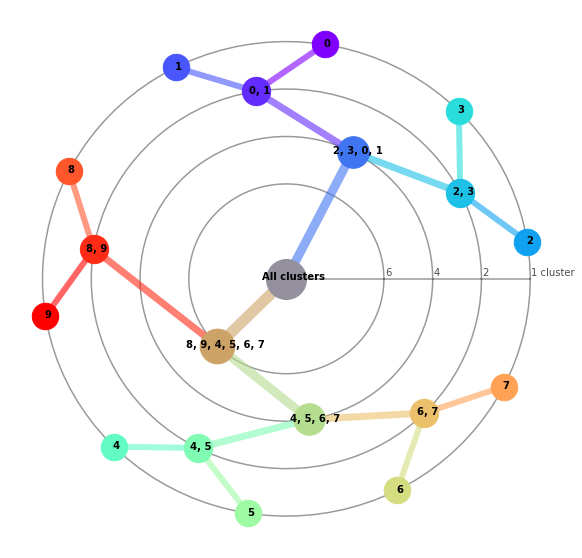

In [12]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111) 
nplink=np.array(link).astype(int)
L_clusters=list(compos(nplink))
plot(ax,L_clusters)
plt.axis("Off")
plt.show()